# Problema 10, 11, 12, 13 y 14

## 10)

Grafiquemos $f(x) = sen(x)$ en el intervalo $x \in (0,\pi)$, su desarrollo de Taylor a 2º orden $T(x)$, centrado en $x = \frac{\pi}{2}$, y el polinomio que mejor ajusta a esta función $p(x)$, obtenido vía cuadrados mínimos: <br>
Calculando analíticamente, $T(x)$ queda de la forma: <br>
<center> $T(x) = 1 - \frac{1}{2}(x-\frac{\pi}{2})^2$ </center> <br>
Y haciendo cuadrados mínimos, $p(x)$ resulta: <br>
<center> $p(x) = A + Bx + Cx^2$ </center> <br>
Donde A, B y C los escribimos en el código directamente.

### Inicio código

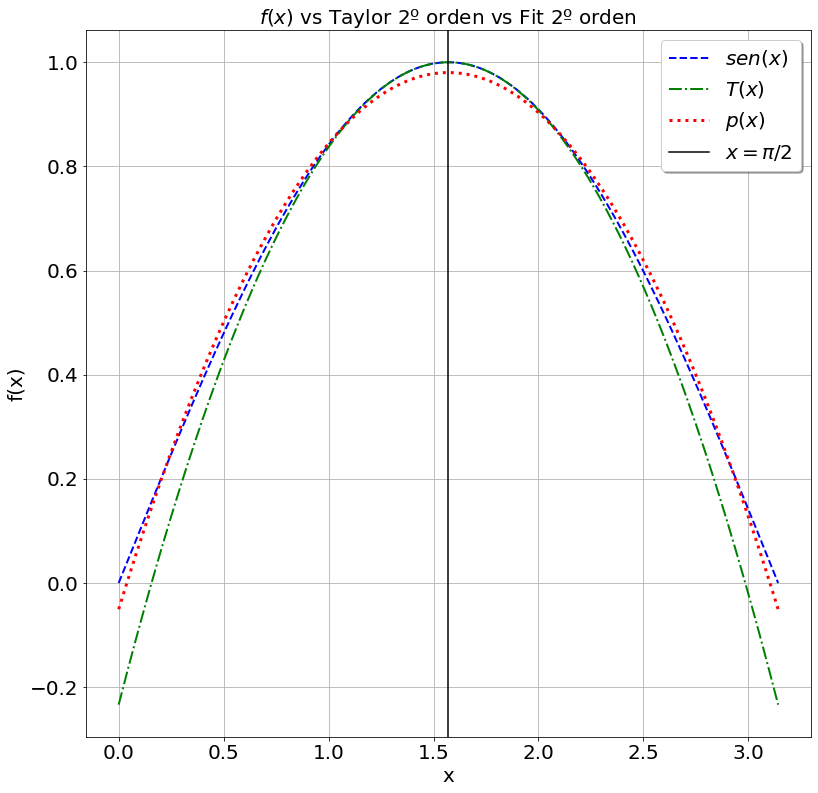

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

x = np.linspace(0,pi,1000)

def sin(x):
    y = np.sin(x)
    return y

def T(x): #Taylor de orden 2 centrado en pi/2
    t = 1 - (x-(pi/2))**2 * 0.5 
    return t

def p(x): #p(x) que mejor ajusta a la función: p(x)=A+Bx+Cx^2
    
    A = 12*(pi**2 - 10)/pi**3
    B = -60*(pi**2 - 12)/pi**4
    C = 60*(pi**2 -12)/pi**5
    
    p = A+(B*x)+C*(x**2)
    return p

#El porqué la elección de las constantes A, B y C se encuentran en el Anexo.

y = sin(x)
z = T(x)
w = p(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='b',label='$sen(x)$',lw=2,ls='--')
plt.plot(x,z,color='g',label='$T(x)$',lw=2,ls='-.')
plt.plot(x,w,color='r',label='$p(x)$',lw=3,ls=':')
plt.title('$f(x)$ vs Taylor 2º orden vs Fit 2º orden',size=20)
plt.grid(True)
plt.axvline(pi/2,label='$x= \pi /2$',color='k')
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

Analicemos ahora el error de ambos métodos (la diferencia de cada uno y $sen(x)$):

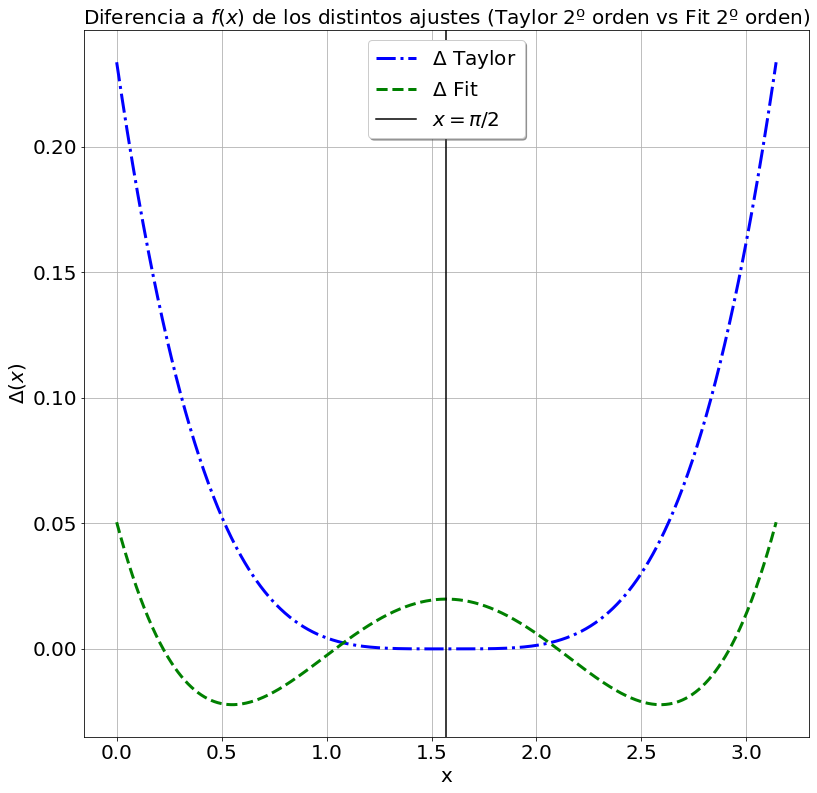

In [16]:
e = (y-z) #dif entre f(x) y su serie de Taylor
E = (y-w) #dif entre f(x) y el p(x) que mejor la ajusta a 2º orden

plt.figure(figsize=(13,13))
plt.plot(x,e,color='b',label='$\Delta$ Taylor',lw=3,ls='-.')
plt.plot(x,E,color='g',label='$\Delta$ Fit',lw=3,ls='--')
plt.title('Diferencia a $f(x)$ de los distintos ajustes (Taylor 2º orden vs Fit 2º orden)',size=20)
plt.grid(True)
plt.axvline(pi/2,label='$x= \pi /2$',color='k')
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [20]:
print(f'La suma del cuadrado de la diferencia para Taylor de 2º orden es {sum(e**2)}')
print(f'La suma del cuadrado de la diferencia para el ajuste de 2º orden es {sum(E**2)}')

La suma del cuadrado de la diferencia para Taylor de 2º orden es 6.302115546315369
La suma del cuadrado de la diferencia para el ajuste de 2º orden es 0.3002969922735787


### Fin código

Por lo que vemos que, si bien el desarrollo de Taylor de 2º es *mejor* para $x \approx \frac{\pi}{2}$, a lo largo de todo el dominio el que mejor ajusta es el polinomio proveniente de pedir cuadrados mínimos.

## 11)

Para comenzar, grafiquemos nuestra distribución de puntos en el espacio de parámetros $log(M)$, $log(R)$ y $log(\sigma_v)$

In [22]:
#Traigamos a Atlas.csv como un df y grafiquemos en 3D para ver el "plano fundamental" de las glx elípticas

import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('Atlas3D.csv', delimiter= '\s+', index_col=False)
df.rename(columns={'#log_mas_gal': 0, 'log_Re_gal': 1, 'log_veldisp_e': 2}, inplace=True)
df #Recordar que 0 => log M, 1 => log R y 2 => log sigma_v

,0,1,2
0,9.797,0.274144,1.879
1,10.042,0.189350,1.996
2,9.771,0.472510,1.806
3,10.065,0.180922,2.108
4,10.005,0.452481,1.870
...,...,...,...
253,9.836,0.111440,1.781
254,10.474,0.291286,2.125
255,9.929,0.276719,1.984
256,10.276,0.050775,2.105


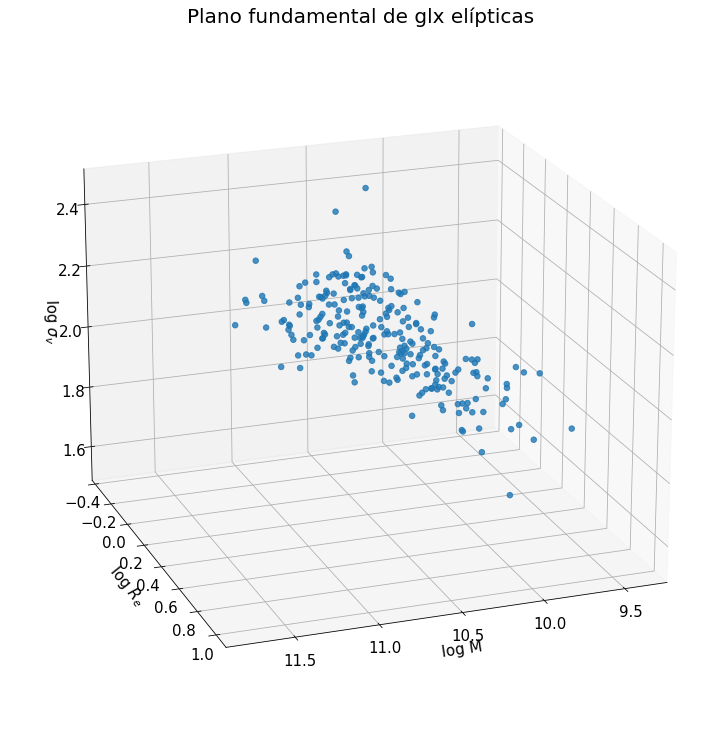

In [48]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0], df[1], df[2],alpha=0.8,s=30)
plt.grid(True)

ax.set_xlabel('log M',size=15)
ax.tick_params(labelsize=15)
ax.set_ylabel('log $R_e$',size=15)
ax.set_zlabel('log $\sigma_v$',size=15)

ax.view_init(elev=20., azim=70)

plt.title('Plano fundamental de glx elípticas',size=20);

Veamos la proyección de estos puntos en los planos $(R,M)$ y $(\sigma ,M)$:

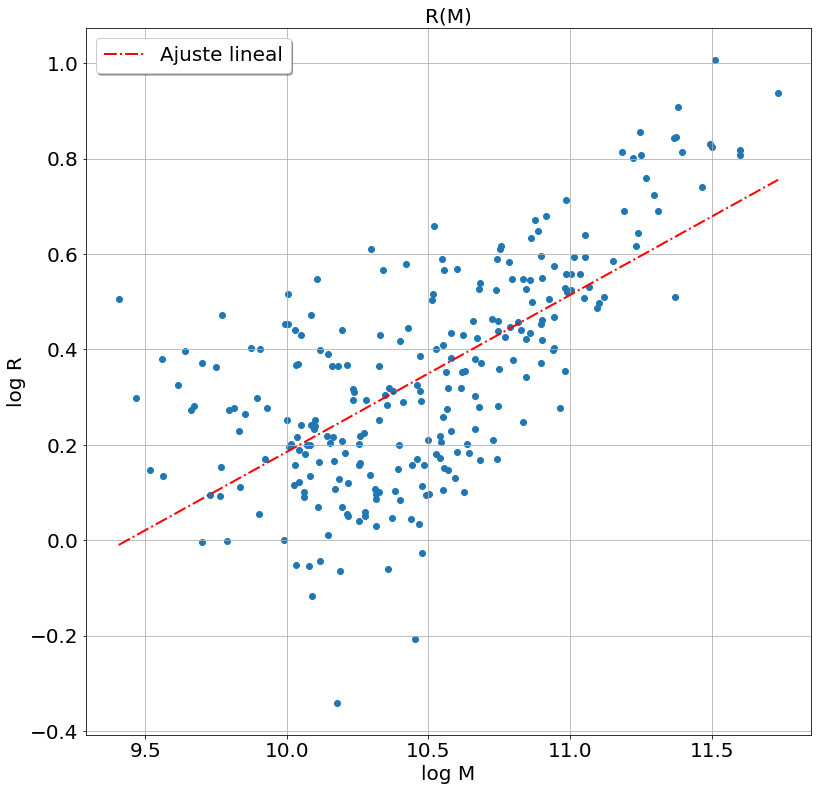

In [52]:
#El ajuste lineal de R(M) y el de sigma(M):

P_Rx = np.polyfit(df[0],df[1],1) #[a,b] de la recta que ajusta a R(M)
P_sx = np.polyfit(df[0],df[2],1) #[a,b] de la recta que ajusta a sigma_v(M)

x = np.linspace(min(df[0]),max(df[0]),100) #Para el dom

plt.figure(figsize=(13,13))
plt.scatter(df[0],df[1])
plt.plot(x,P_Rx[0]*x + P_Rx[1],color='r',label='Ajuste lineal',lw=2,ls='-.')
plt.title('R(M)',size=20)
plt.grid(True)
plt.xlabel('log M',size=20)
plt.ylabel('log R',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

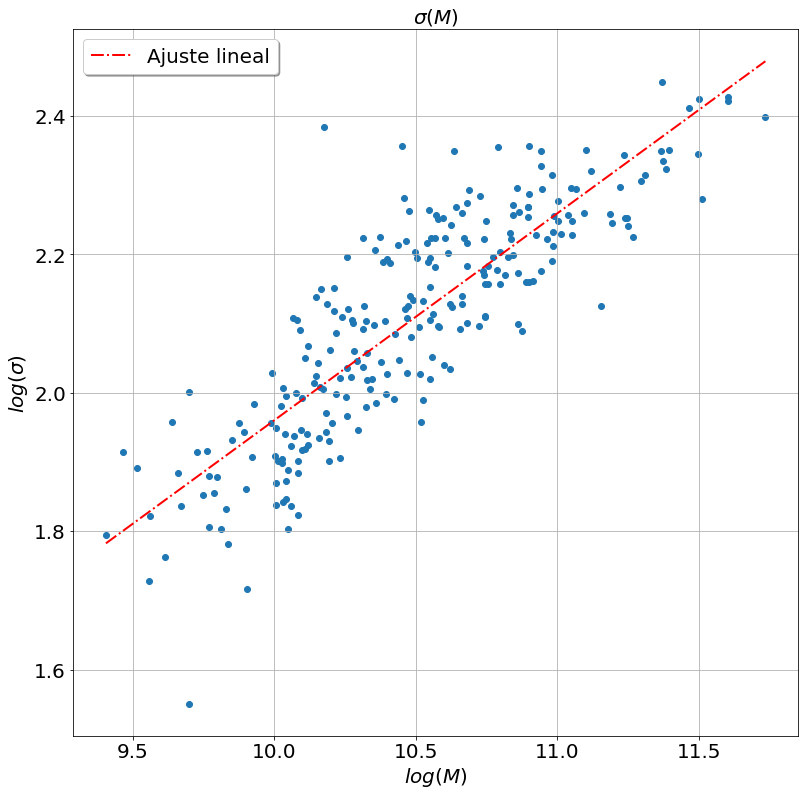

In [57]:
plt.figure(figsize=(13,13))
plt.scatter(df[0],df[2])
plt.plot(x,P_sx[0]*x + P_sx[1],color='r',label='Ajuste lineal',lw=2,ls='-.')
plt.title('$\sigma (M)$',size=20)
plt.grid(True)
plt.xlabel('$log (M)$',size=20)
plt.ylabel('$log (\sigma)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

Y ahora si, ajustemos el mejor plano, vía cuadrados mínimos:

In [60]:
#Probamos con un least-squares para un plano:

import scipy.linalg

# Grid para cubrir el dominio
X,Y = np.meshgrid(x,y)
XX = X.flatten()
YY = Y.flatten()

order = 1    # 1 => plano

# Buscamos el fit
A = np.c_[df[0], df[1], np.ones(len(df[0]))]
C,_,_,_ = scipy.linalg.lstsq(A, df[2])    # coeficientes del ajuste

# Evaluamos sobre la grilla, para obtener el plano:
Z = C[0]*X + C[1]*Y + C[2]

Sabemos que la ecuación de un plano es <br>
<center> $ax + by + cz + d = 0$ </center> <br>
Que se puede reescribir como <br>
<center> $z = Ax + By + C$ </center> <br>
Luego, como mejor ajuste obtuvimos <br>

In [64]:
print(f'A = {C[0]}')
print(f'B = {C[1]}')
print(f'C = {C[2]}')

A = 0.39954937862452045
B = -0.30595146901363734
C = -1.9784562250362212


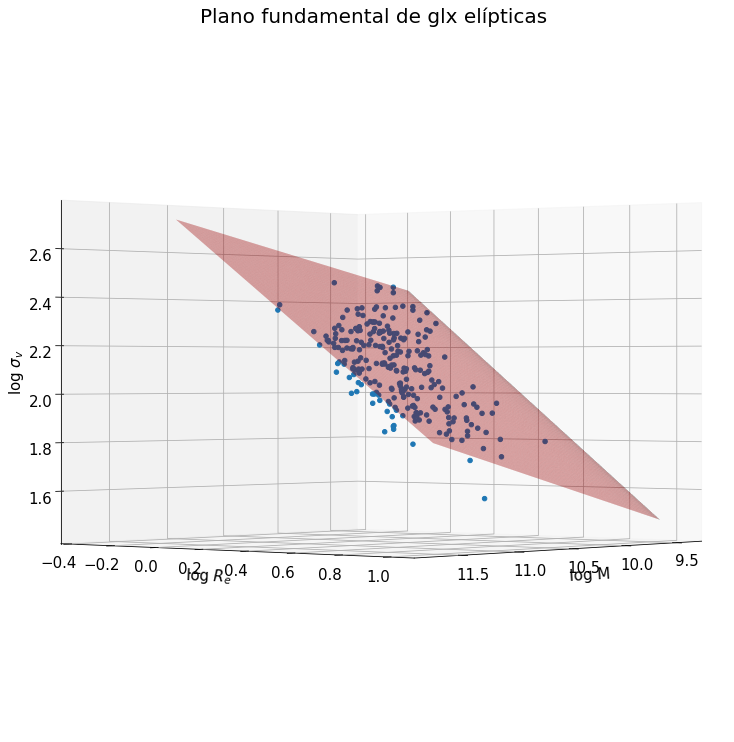

In [66]:
#Ploteamos (para mejor visualización, cambiamos el ángulo de la cámara):

fig = plt.figure(figsize=(13,13))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2,color='r')
ax.scatter(df[0],df[1],df[2], s=20,alpha=1)
plt.grid(True)
ax.set_xlabel('log M',size=15)
ax.tick_params(labelsize=15)
ax.set_ylabel('log $R_e$',size=15)
ax.set_zlabel('log $\sigma_v$',size=15)

ax.view_init(elev=0., azim=40) #Acá se puede cambiar el áng de la cámara

plt.title('Plano fundamental de glx elípticas',size=20);

## 12)

Queremos construir el polinomio interpolatorio de Lagrange $(p(x))$ de grado $N = 2$ para $f(x) = e^x$ en el intervalo $[-1,1]$, conociendo los puntos $x_i = (-1,0,1)$. <br>
Comencemos graficando la función:

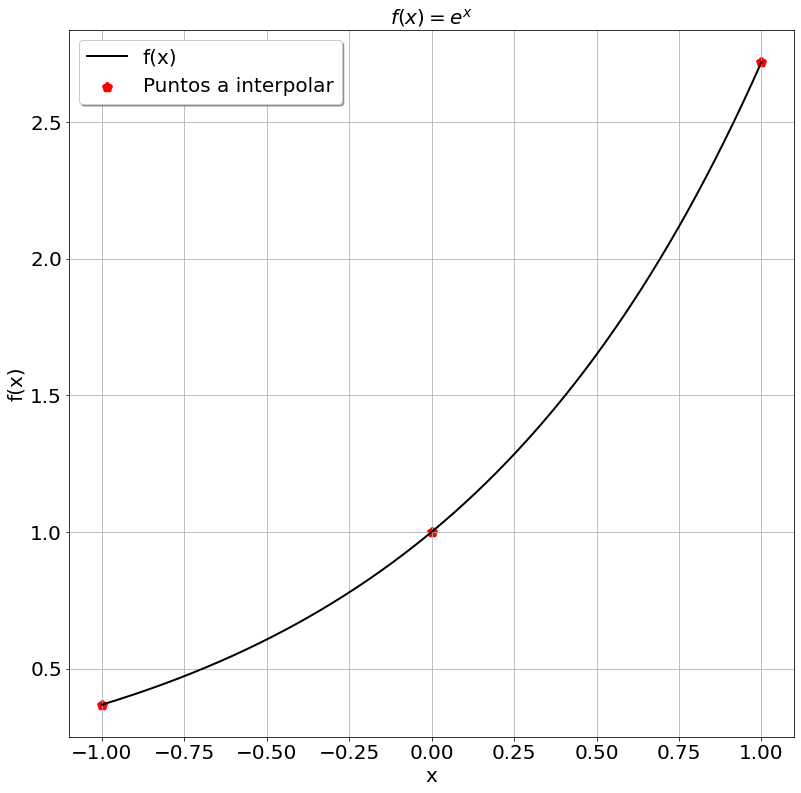

In [76]:
x = np.linspace(-1, 1, 1000) 
y = np.exp(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter([-1,0,1],np.exp([-1,0,1]),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$f(x)=e^x$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [84]:
#Los puntos que me dan son:

n = int(input('Cantidad de puntos conocidos:'))
X = [] # lista de valores en x.
Y = [] # lista de f(x) calculados.

for i in range(n):
    a = float(input('Punto en x:')) #pido los x que conozco
    X.append(a) #armo la lista de x
    b = np.exp(a) #calculo f(x)
    Y.append(b) #armo la lista de y
    
print(X)
print(Y)

Cantidad de puntos conocidos: 3
Punto en x: -1
Punto en x: 0
Punto en x: 1


[-1.0, 0.0, 1.0]
[0.36787944117144233, 1.0, 2.718281828459045]


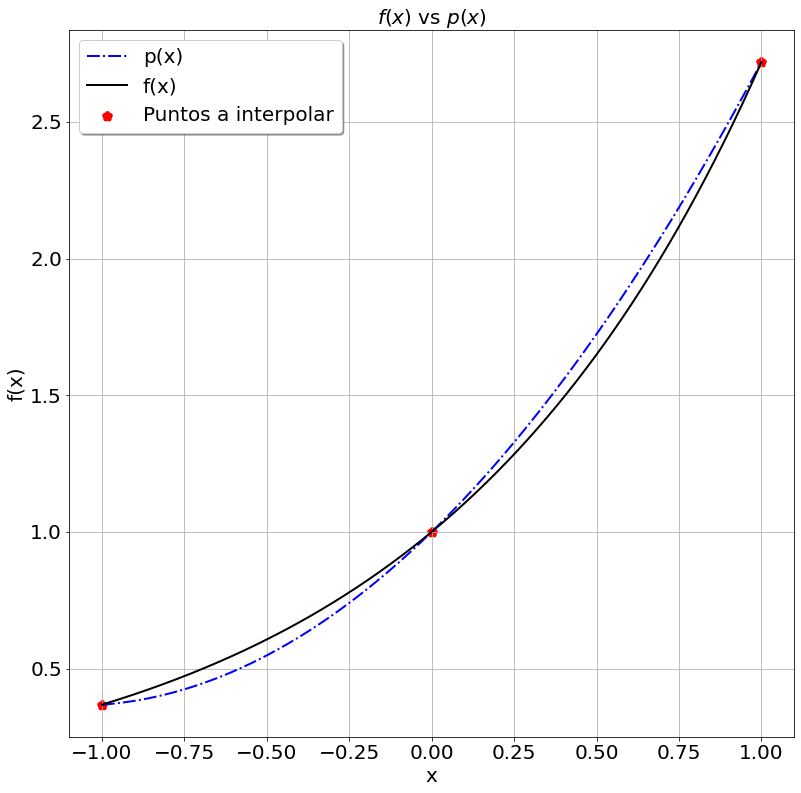

In [85]:
#escribamos el polinomio de grado n-1, p:

def p(x):
    
    p = 0 #variable para la sumatoria
        
    for j in range(n): #sumatoria desde j hasta n-1
        
        l = 1 #variable para la productoria, adentro del loop de la sumatoria
        
        for i in range(n): #productoria para el l(x)
            
            if i == j: #en la productoria no entra el término i = j
                continue
            else:
                l = l*((x-X[i])/(X[j]-X[i])) #tengo que definir la lista de pts X y su f(x), Y.
                
            #print(l) revisamos cada término de l
                
        p += l*Y[j] #usando lista y el polinomio l_j, voy armando el polinomio p con n pts. 
        
    return p

x = np.linspace(-1, 1, 1000) #dominio
y = p(x) #el polinomio creado
z = np.exp(x) #función dada

plt.figure(figsize=(13,13))
plt.plot(x,y,color='b',lw=2,ls='-.',label='p(x)')
plt.plot(x,z,color='k',lw=2,label='f(x)')
plt.scatter([-1,0,1],np.exp([-1,0,1]),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$f(x)$ vs $p(x)$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

##### *Vemos que se cumple que $p(x_i) = f(x_i)$*

Analicemos la diferencia entre $p(x)$ y $f(x)$:

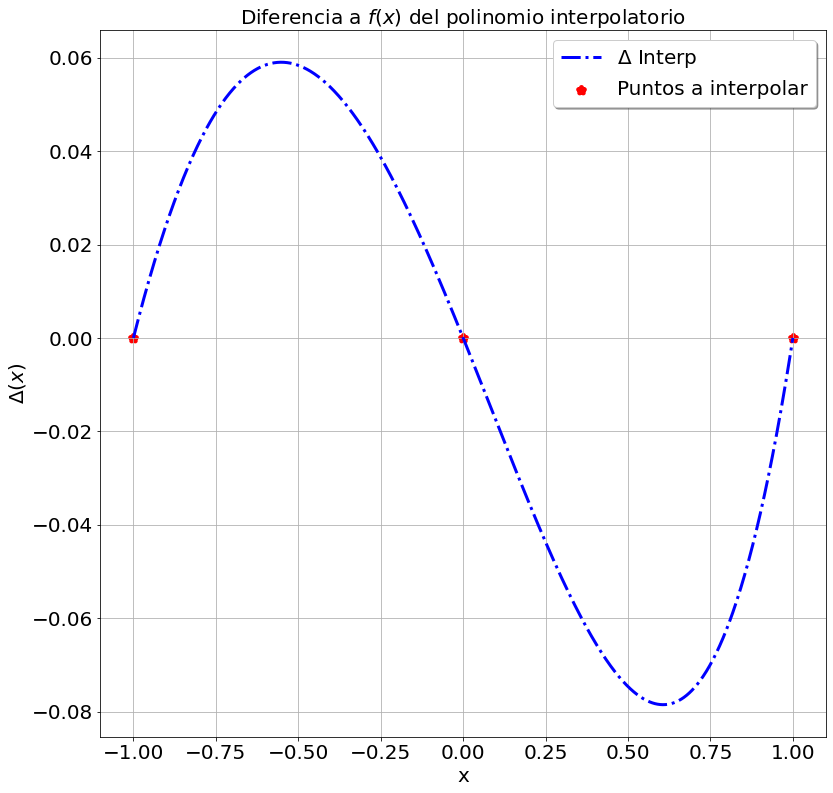

In [94]:
e = (z-y) #dif entre f(x) y su serie de Taylor

plt.figure(figsize=(13,13))
plt.plot(x,e,color='b',label='$\Delta$ Interp',lw=3,ls='-.')
plt.title('Diferencia a $f(x)$ del polinomio interpolatorio',size=20)
plt.grid(True)
plt.scatter([-1,0,1],[0,0,0],marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

## 13)

Repetimos el proceso del Problema 11), sólo que ahora busco $p(x)$ de grado $N=10$ para $f(x) = \frac{1}{1+x^2}$ en el intervalo $[-5,5]$, conociendo los puntos $x_i = (-5,-4,...,5)$. <br>

In [96]:
#El grado de polinomio que quiero es n-1:

n = (int(input('Grado del polinomio requerido:')))+1 #cantidad de puntos a usar
X = [] # lista de valores en x.
Y = [] # lista de f(x) calculados.

for i in range(n):
    a = (10/(n-1))*i - 5 # n puntos equiespaciados en el dominio especificado [-5;5] (se divide por n-1 porque 0 es otro punto)
    X.append(a) #armo la lista de x
    b = 1/(1+a**2) #calculo f(x)
    Y.append(b) #armo la lista de y
    
#print(X)
#print(Y) #corroboramos

Grado del polinomio requerido: 10


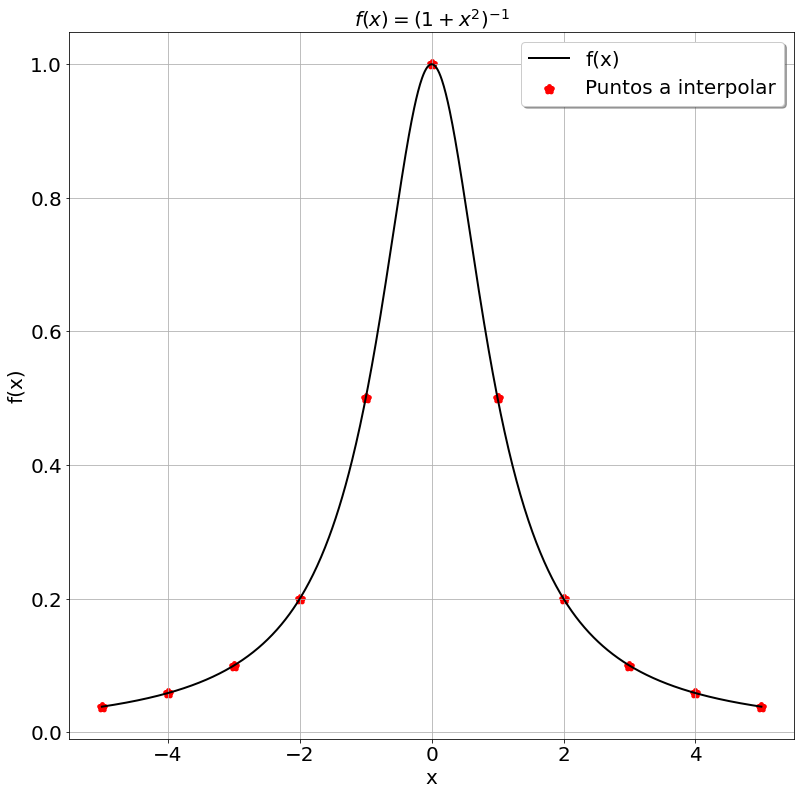

In [97]:
x = np.linspace(-5, 5, 1000) 
y = 1/(1+x**2)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$f(x)=(1+x^2)^{-1}$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

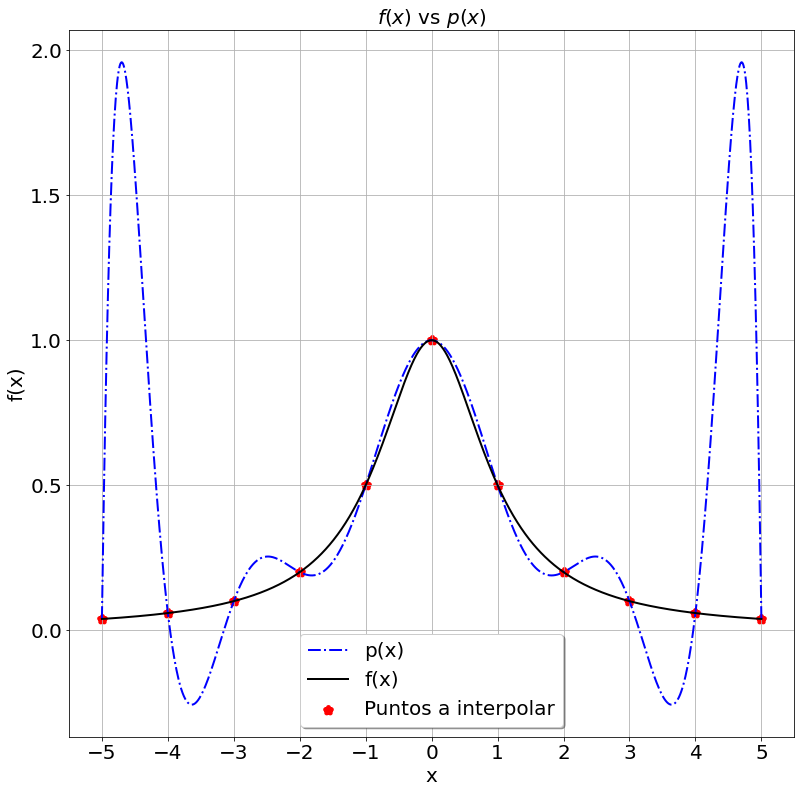

In [98]:
z = p(x) #el polinomio creado

plt.figure(figsize=(13,13))
plt.plot(x,z,color='b',lw=2,ls='-.',label='p(x)')
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$f(x)$ vs $p(x)$',size=20)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

plt.xticks(X)
plt.grid(True)

Si bien se cumple la condición $p(x_i) = f(x_i)$, notamos que a órdenes altos aparecen muchos *Wiggles*

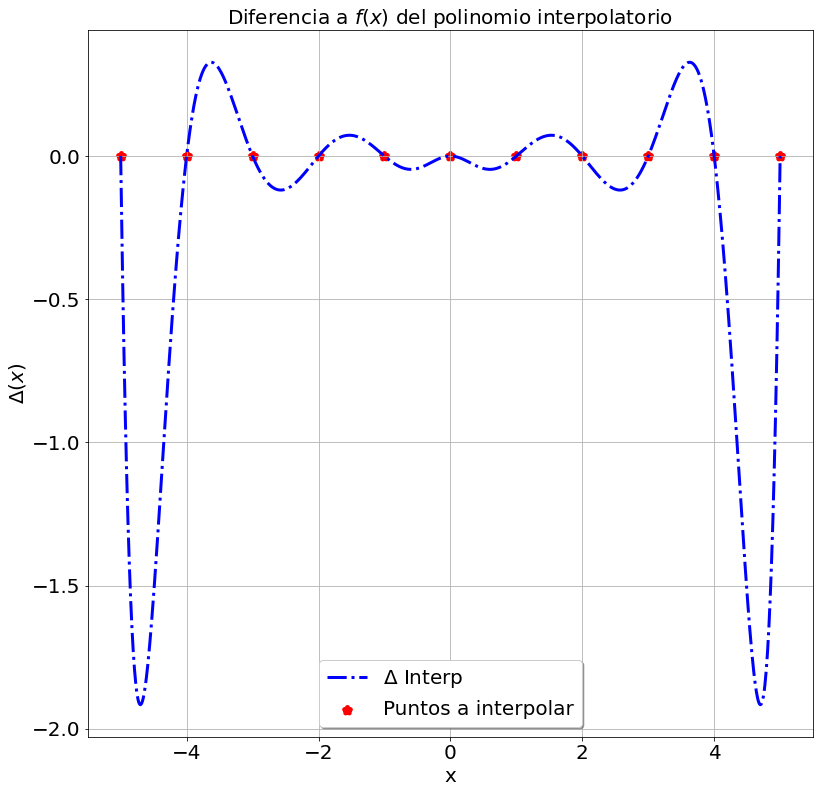

In [100]:
e = (y-z) #dif entre f(x) y su serie de Taylor

plt.figure(figsize=(13,13))
plt.plot(x,e,color='b',label='$\Delta$ Interp',lw=3,ls='-.')
plt.title('Diferencia a $f(x)$ del polinomio interpolatorio',size=20)
plt.grid(True)
plt.scatter(X,np.zeros(len(X)),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

## 14)

Busco $p(x)$ de grado $N=3$, conociendo los puntos $(x_i,f(x_i)) = (0,0),(1,1)$. Pero ahora no conozco la forma de $f(x)$, si no que el valor de sus derivadas en los extremos: $f'(0) = 1$ y $f'(1) = 0$. <br>
En este caso, estamos buscando el polinomio interpolatorio de Hermite $h(x)$:

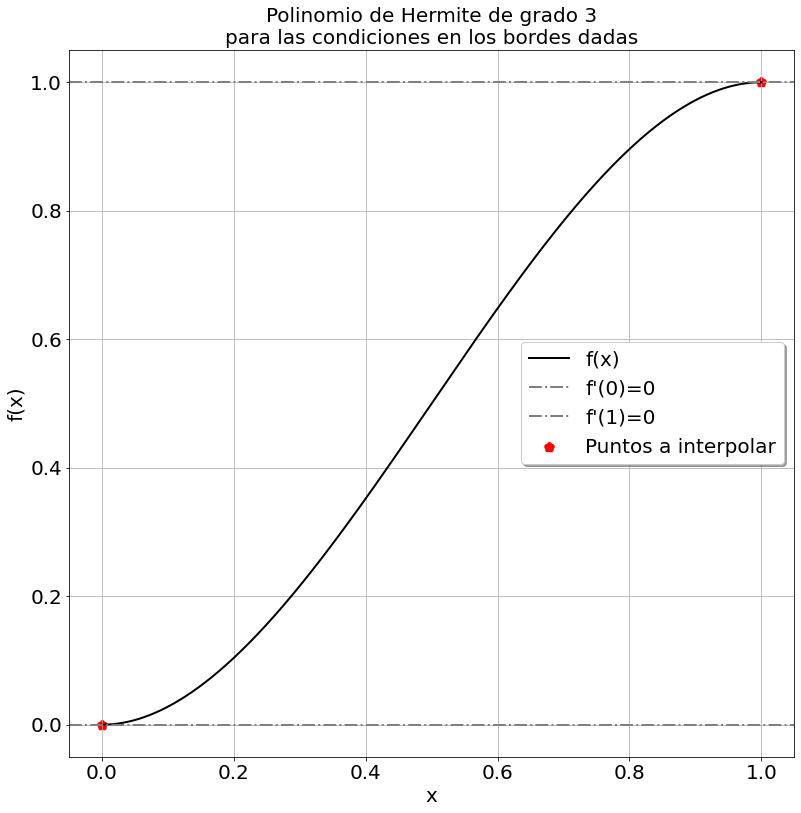

In [109]:
X = [0,1] #pts en x
Y = [0,1] #p(x)
D = [1,0] #p'(x)

#Forma del polinomio interpolatorio de Hermite de grado 3 (necesito 2 pts, y el valor de las derivadas en ese punto).

def h(x):
    h = (((3*X[0]-2*x-X[1])*(x-X[1])**2)/(X[0]-X[1])**3)*Y[0] + (((3*X[1]-2*x-X[0])*(x-X[0])**2)/(X[1]-X[0])**3)*Y[1]
    + ((x-X[0])*(x-X[1])**2)/((X[0]-X[1])**2)*D[0] + ((x-X[1])*(x-X[0])**2)/((X[1]-X[0])**2)*D[1]
    return h

x = np.linspace(0, 1, 1000) 
y = h(x)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter([0,1],[0,1],marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('Polinomio de Hermite de grado 3\npara las condiciones en los bordes dadas',size=20)
plt.axhline(0,lw=2,ls='-.',color='gray',label="f'(0)=0")
plt.axhline(1,lw=2,ls='-.',color='gray',label="f'(1)=0")
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);